In [14]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x, y):
    # 楕円
    return x**2 + y**2 / 4

### 楕円1

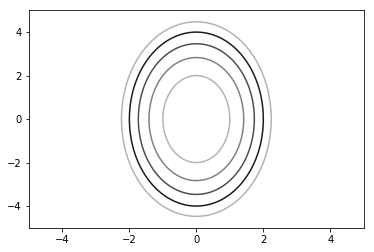

In [24]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
xmesh, ymesh = np.meshgrid(x, y)
z = f(xmesh.ravel(), ymesh.ravel()).reshape(xmesh.shape)

# levelsで描画する楕円の式の値を決める
plt.contour(x, y, z, colors=["0.7", "0.5", "0.3", "0.1"], levels=[1,2,3,4,5])
plt.show()

### 楕円2

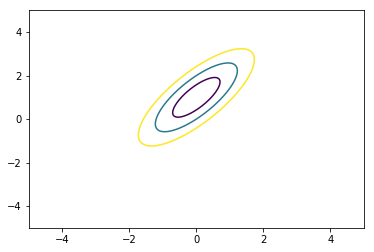

In [28]:
import sys

def f2(x, y):
    # 楕円
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

# 楕円
z = f2(xmesh.ravel(), ymesh.ravel()).reshape(xmesh.shape)

plt.contour(x, y, z, levels=[-2, 0, 3])

### 勾配降下法

In [110]:
import numpy as np

class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f # 最小化したい関数
        self.df = df # 最小化したい関数の導関数
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        x = init # 初期値
        path = [] # 勾配降下の履歴パスを保存する
        grad = self.df(x)
        path.append(x)
        cnt = 0
        # 勾配ベクトルのノルム2乗がepsより大きい限りループ
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad # 現在地から勾配ベクトルの方向へalpha分動く
            grad = self.df(x) # 新しいポイントで勾配を更新
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

[3.02915007e-07 1.00000042e+00]
-2.999999999999775


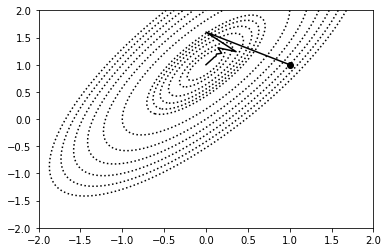

In [74]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 最小化したい関数
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

# 導関数(x, yの偏微分結果)
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])


algo = GradientDescent(f, df, alpha=0.1)
initial = np.array([1,1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

# 初期値をプロット
plt.scatter(initial[0], initial[1], color="k", marker="o")
# 勾配降下の経過点を可視化
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
# reshape(1, -1)で1次元配列を2次元配列に変換し、np.r_で結合を行う（axis=0で結合される）
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]

# zには値を最小化したかった楕円の関数を入れており、index0にx, index1にyの座標を格納してxxとして渡している
# zは各座標がどの楕円上に位置する座標かを求めた点の集まりであり、levelsでその楕円を示す座標をとってくる。
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors="k", linestyles="dotted")
plt.show()

[4.915281814827202e-07, 2.415999531917099e-13]
2.415999531917099e-13


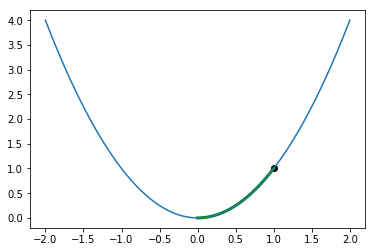

In [126]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f # 最小化したい関数
        self.df = df # 最小化したい関数の導関数
        self.alpha = alpha
        self.eps = eps
        self.path = None
        
    def solve(self, init):
        xy = init # 初期値
        x = xy[0]
        path = [] # 勾配降下の履歴パスを保存する
        grad = self.df(x)
        path.append(xy)
        # 勾配ベクトルのノルム2乗がepsより大きい限りループ
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad # 現在地から勾配ベクトルの方向へalpha分動く
            grad = self.df(x) # 新しいポイントで勾配を更新
            xy = [x, self.f(x)]
            path.append(xy)
        self.path_ = np.array(path)
        self.x_ = xy
        self.opt_ = self.f(x)

# 最小化したい関数
def f(x):
    return x**2

# 導関数(x, yの偏微分結果)
def df(x):
    return 2*x


algo = GradientDescent(f, df, alpha=0.01)
initial = np.array([1,1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

# 初期値をプロット
plt.scatter(initial[0], initial[1], color="k", marker="o")
# 勾配降下の経過点を可視化
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="g", linewidth=3)

xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
plt.plot(xs, f(xs))
plt.show()